In [ ]:
!pip install auto-sklearn

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
import autosklearn.regression
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

In [ ]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Графики для района(deprecated)



In [ ]:
X = pd.DataFrame()
X['Район'] = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
X['Стадия строительной готовности на дату договора'] = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3]
X['Срок ввода в эксплуатацию - Старт продаж'] = [822, 822, 608, 608, 822, 822, 1217, 1217, 669, 669]
X['Класс'] = [2,2,2,2,2,2,2,2, 2, 2]
X['Девелопер'] = [17,17, 7, 7, 17, 17, 9, 9, 7, 7]
X['Срок ввода в эксплуатацию - Договор'] = [378,378, 173, 173, 518, 518, 380, 380, 593, 593]
X['Квартал договора'] = [3,3,4,4, 3, 3, 2, 2, 3, 3]
X['Квартал регистрации'] = [3,3,4,4, 3, 3, 2, 2, 2, 2]
X['Тип сделки'] = [1,1,1,1,1,1,1,1, 0, 0]
X['Тип объекта'] = [1,1,1,1,1,1,1,1, 1, 1]
X['Секция'] = [1,1,5,5,5,5,1,1, 6, 6]
X['Этаж'] = [3,3,1,1, 15,15,5,5, 5, 5]
X['Количество комнат'] = [3,3,4,4,0,0,1,1, 1, 1]
X['Площадь согласно ПД'] = [72.5, 72.5, 165.7,165.7,19.7,19.7,36.7,36.7, 37.7, 37.7]
X['Метод определения цены'] = [4,4, 1, 1,4,4,4,4, 4, 4]
X['Включение скидок/акций в ценообразование'] = [0,0, 2,2,2,2,1,1, 2, 2]
X['Скидки по дате договора'] = [0,0,2,2,0,0,15,15, 5, 5]
X['Отделка по корпусу'] = [8, 8, 0, 0,8,8,6,6, 8, 8]
X['Тип продавца'] =[1,1, 1, 1,1,1,1,1, 1, 1]
X['Тип покупателя'] = [0, 0, 0,0,0,0,0,0, 0, 0]
X['Кол-во покупателей'] = [2,2, 1, 1,1,1,1,1, 1, 1]
X['Тип ипотеки'] = [0,0, 0,0,0,0,0,0, 0, 0]
X['Участие объекта в оптовой сделке'] = [1,1, 1, 1,1,1,1,1, 1, 1]
X['Срок в экспозиции до момента сделки, дней'] = [64,64, 0,0,0,0,0,0, 46, 46]
X['Рост цены за 1 кв.м за период экспонирования'] = [1.3, 1.3, 0,0,0,0,0,0, -4.5, -4.5]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Район                                            10 non-null     int64  
 1   Стадия строительной готовности на дату договора  10 non-null     int64  
 2   Срок ввода в эксплуатацию - Старт продаж         10 non-null     int64  
 3   Класс                                            10 non-null     int64  
 4   Девелопер                                        10 non-null     int64  
 5   Срок ввода в эксплуатацию - Договор              10 non-null     int64  
 6   Квартал договора                                 10 non-null     int64  
 7   Квартал регистрации                              10 non-null     int64  
 8   Тип сделки                                       10 non-null     int64  
 9   Тип объекта                        

In [ ]:
res = model.predict(X)
res

array([133496.515625 , 135528.640625 , 125283.6796875, 124008.5234375,
       248554.421875 , 250595.671875 , 120296.1875   ,  91618.4453125,
       147826.171875 , 145612.8125   ])

In [ ]:
change = list()
for i in range(0, len(res), 2):
  ch = (X['Площадь согласно ПД'][i+1]*res[i+1])/(X['Площадь согласно ПД'][i]*res[i])
  if ch >=1:
    change.append(ch-1)
  else:
    change.append(-(1-ch))
change

[0.0152223074174338,
 -0.01017815132170985,
 0.008212487167202909,
 -0.23839277689078886,
 -0.014972716582768553]

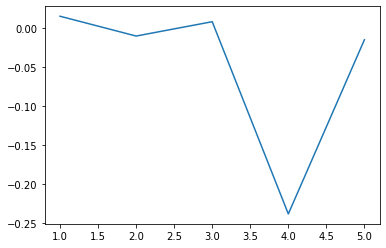

In [ ]:
plt.plot([1,2,3,4,5], change)
plt.show()

AttributeError: ignored

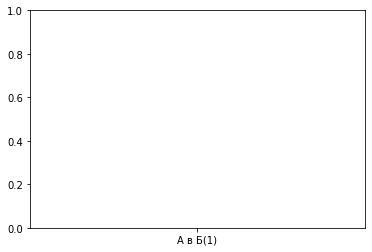

In [ ]:
plt.plot(["А в Б(1)", "А в Б(1)","А в Б(1)","А в Б(1)","А в Б(1)"], change, histtype='bar', rwidth=0.8)

# Графики для Срок ввода в эксплуатацию - Старт продаж


In [ ]:
pos = [58]
for i in range(1,10):
  pos.append(58+(219*i))
pos


[58, 277, 496, 715, 934, 1153, 1372, 1591, 1810, 2029]

In [ ]:
dt = pd.read_excel('ml.xlsx')
dt

In [ ]:
df = dt
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.isnull().sum().sum()

0

In [ ]:
a = (df.loc[df['Срок ввода в эксплуатацию - Старт продаж'] > 944])
a = (a.loc[a['Срок ввода в эксплуатацию - Старт продаж'] < 1153])
b = a.sample(frac=0.00255)
b

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
29695,0,0,1020.0,2,7,285.0,2,2,1,1,1,11,4,105.20,131218.0,4,0,7,8,1,0,1,1,1,0,0.0
20451,0,5,990.0,1,6,777.0,4,4,1,1,2,7,1,37.10,149179.0,0,0,0,0,1,0,1,0,1,0,0.0
44766,0,4,1036.0,2,3,43.0,4,3,0,1,8,10,3,82.30,112389.0,5,1,15,0,1,0,1,1,1,984,18.3
56127,0,1,996.0,2,15,43.0,2,1,0,1,4,7,1,36.25,115436.0,1,0,0,8,0,0,1,0,1,0,0.0
11985,0,5,1036.0,2,17,930.0,2,2,1,1,7,7,2,69.30,111700.0,4,0,2,8,1,0,2,1,1,0,0.0
37817,0,1,983.0,2,17,640.0,3,1,1,1,1,11,2,52.50,140400.0,4,2,0,8,1,0,2,0,1,0,0.0
179,0,5,1064.0,2,8,901.0,1,1,1,1,5,3,1,46.10,99254.1,4,0,0,0,1,0,1,1,1,0,0.0
13590,0,3,1036.0,2,17,907.0,3,3,1,1,1,2,1,39.40,141900.0,4,0,2,8,1,0,1,1,1,84,-3.3
35550,0,1,983.0,2,17,663.0,3,3,1,1,2,11,2,59.10,132400.0,4,2,0,8,1,0,1,0,1,21,0.2
44383,0,4,1036.0,2,3,46.0,4,3,0,1,12,9,2,57.10,127566.0,4,1,15,0,1,0,1,0,1,926,22.7


In [ ]:
c = (df.loc[df['Срок ввода в эксплуатацию - Старт продаж'] > 1810])
d = c.sample(frac=0.04)
d

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
7978,1,0,1819.0,2,20,1.0,2,3,0,1,4,2,2,63.70,74399.61,4,0,0,0,1,1,1,0,0,738,52.9
50633,1,0,1921.0,2,20,-98.0,1,3,0,1,4,1,1,35.20,105142.86,4,0,5,0,0,1,1,1,0,0,0.0
51957,1,1,2252.0,2,20,277.0,1,2,0,1,4,1,2,68.12,67156.00,2,0,5,0,1,1,1,0,0,0,0.0
31142,1,4,1826.0,2,20,55.0,3,4,0,1,4,2,2,62.30,58806.00,1,0,7,0,0,0,1,1,1,0,0.0
60794,1,0,1932.0,2,20,-203.0,3,3,0,1,4,2,2,52.30,90519.00,6,0,5,0,1,0,2,1,1,0,0.0


In [ ]:
e = (df.loc[df['Срок ввода в эксплуатацию - Старт продаж'] < 277])
f = e.sample(frac=0.005)
f

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
5688,0,0,120.0,3,8,6.0,1,2,0,1,1,8,1,38.5,145237.87,4,1,2,4,1,1,1,1,0,0,0.0
7849,0,0,58.0,3,8,-22.0,2,2,0,1,1,17,1,40.0,146570.18,4,1,2,5,1,1,1,1,0,21,0.0
7803,0,0,58.0,3,8,-22.0,2,2,0,1,2,13,1,40.0,148207.00,4,1,2,5,1,1,1,1,0,9,0.0
35908,0,1,213.0,2,8,113.0,3,3,1,1,10,9,1,39.1,183128.72,4,1,2,0,1,0,1,0,1,0,0.0
6457,0,0,184.0,3,8,-4.0,2,2,0,1,6,10,2,64.0,142008.14,4,1,2,8,1,1,1,1,0,119,0.0


In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = b[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(b[i:i+1], ignore_index=True)
  for j in pos:
    temp = b[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Старт продаж'] > 0), 'Срок ввода в эксплуатацию - Старт продаж'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X = plot_data.drop(['Цена за кв. метр'], axis=1).copy(deep=True)
X

In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = d[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(d[i:i+1], ignore_index=True)
  for j in pos:
    temp = d[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Старт продаж'] > 0), 'Срок ввода в эксплуатацию - Старт продаж'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X1 = plot_data.drop(['Цена за кв. метр'], axis=1).copy(deep=True)
X1

In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = f[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(d[i:i+1], ignore_index=True)
  for j in pos:
    temp = f[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Старт продаж'] > 0), 'Срок ввода в эксплуатацию - Старт продаж'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X2 = plot_data.drop(['Цена за кв. метр'], axis=1)
X2

In [ ]:
res = model.predict(X)
res

In [ ]:
res1 = model.predict(X1)
res1

In [ ]:
res2 = model.predict(X2)
res2

In [ ]:
change = list()
for i in range(0, len(res), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X['Площадь согласно ПД'][i]*res[i])/(X['Площадь согласно ПД'][i+j]*res[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change.append(chg)
change

In [ ]:
change1 = list()
for i in range(0, len(res1), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X1['Площадь согласно ПД'][i]*res1[i])/(X1['Площадь согласно ПД'][i+j]*res1[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change1.append(chg)
change1

In [ ]:
change2 = list()
for i in range(0, len(res2), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X2['Площадь согласно ПД'][i]*res2[i])/(X2['Площадь согласно ПД'][i+j]*res2[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change2.append(chg)
change2

No handles with labels found to put in legend.


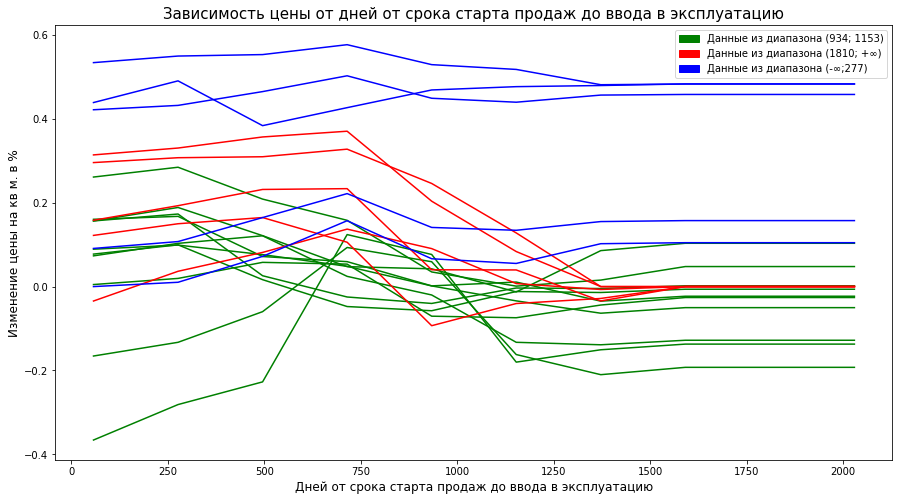

In [ ]:
plt.figure(figsize=(15, 8))
plt.xlabel('Дней от срока старта продаж до ввода в эксплуатацию', fontsize=12)
plt.ylabel('Изменение цены на кв м. в %', fontsize=12)
plt.plot(pos, change[0], '-g',  pos, change[1], '-g', pos, change[2], '-g', pos, change[3], '-g', pos, change[4], '-g', pos, change[5], '-g', pos, change[6], '-g', pos, change[7], '-g', pos, change[8], '-g', pos, change[9], '-g', pos, change1[0], '-r', pos, change1[1], '-r', pos, change1[2], '-r', pos, change1[3], '-r', pos, change1[4], '-r', pos, change2[0], '-b', pos, change2[1], '-b', pos, change2[2], '-b', pos, change2[3], '-b', pos, change2[4], '-b')
plt.legend()
plt.title('Зависимость цены от дней от срока старта продаж до ввода в эксплуатацию', fontsize=15)
plt.legend(handles=[mpatches.Patch(label='Данные из диапазона (934; 1153)',color='green'),mpatches.Patch(label='Данные из диапазона (1810; +∞)', color='red'),mpatches.Patch(label='Данные из диапазона (-∞;277)', color='blue')])

# Графики для Срок ввода в эксплуатацию - Договор

In [ ]:
pos = [-1086]
for i in range(1,10):
  pos.append(-1086+(227*i))
pos

[-1086, -859, -632, -405, -178, 49, 276, 503, 730, 957]

In [ ]:
dt = pd.read_excel('ml.xlsx')

In [ ]:
df = dt
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()

In [ ]:
a = (df.loc[df['Срок ввода в эксплуатацию - Договор'] > -178])
a = (a.loc[a['Срок ввода в эксплуатацию - Договор'] < 49])
b = a.sample(frac=0.003)


In [ ]:
c = (df.loc[df['Срок ввода в эксплуатацию - Договор'] > 730])
d = c.sample(frac=0.0008)


In [ ]:
e = (df.loc[df['Срок ввода в эксплуатацию - Договор'] < -632])
f = e.sample(frac=0.29)


In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = b[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(b[i:i+1], ignore_index=True)
  for j in pos:
    temp = b[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Договор'] > -9999), 'Срок ввода в эксплуатацию - Договор'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X = plot_data.drop(['Цена за кв. метр'], axis=1).copy(deep=True)
X.head(25)

In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = d[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(d[i:i+1], ignore_index=True)
  for j in pos:
    temp = d[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Договор'] > -9999), 'Срок ввода в эксплуатацию - Договор'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X1 = plot_data.drop(['Цена за кв. метр'], axis=1).copy(deep=True)
X1

In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = f[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(d[i:i+1], ignore_index=True)
  for j in pos:
    temp = f[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Договор'] > -9999), 'Срок ввода в эксплуатацию - Договор'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X2 = plot_data.drop(['Цена за кв. метр'], axis=1)
X2

In [ ]:
res = model.predict(X)
res

In [ ]:
res1 = model.predict(X1)
res1

In [ ]:
res2 = model.predict(X2)
res2

In [ ]:
change = list()
for i in range(0, len(res), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X['Площадь согласно ПД'][i]*res[i])/(X['Площадь согласно ПД'][i+j]*res[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change.append(chg)
change

In [ ]:
change1 = list()
for i in range(0, len(res1), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X1['Площадь согласно ПД'][i]*res1[i])/(X1['Площадь согласно ПД'][i+j]*res1[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change1.append(chg)
change1

In [ ]:
change2 = list()
for i in range(0, len(res2), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X2['Площадь согласно ПД'][i]*res2[i])/(X2['Площадь согласно ПД'][i+j]*res2[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change2.append(chg)
change2

No handles with labels found to put in legend.


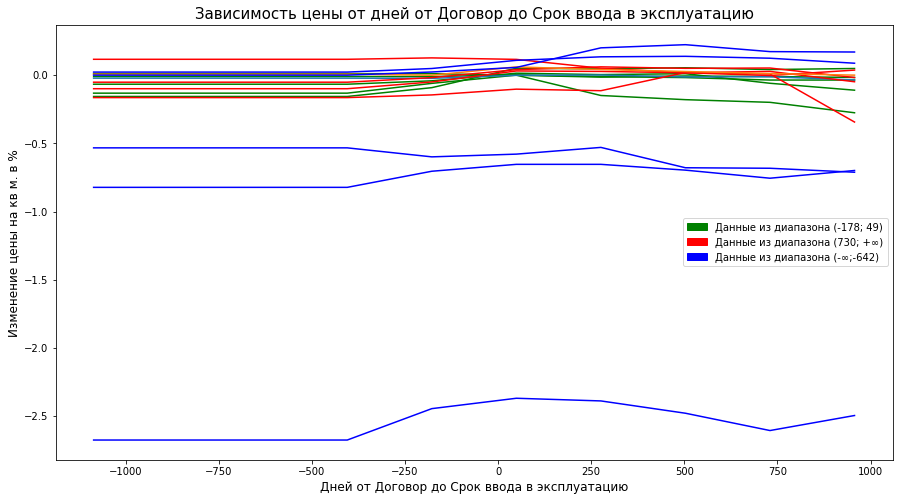

In [ ]:
plt.figure(figsize=(15, 8))
plt.xlabel('Дней от Договор до Срок ввода в эксплуатацию', fontsize=12)
plt.ylabel('Изменение цены на кв м. в %', fontsize=12)
plt.plot(pos, change[0], '-g',  pos, change[1], '-g', pos, change[2], '-g', pos, change[3], '-g', pos, change[4], '-g', pos, change[5], pos, change1[0], '-r', pos, change1[1], '-r', pos, change1[2], '-r', pos, change1[3], '-r', pos, change1[4], pos, change2[0], '-b', pos, change2[1], '-b', pos, change2[2], '-b', pos, change2[3], '-b', pos, change2[4], '-b')
plt.legend()
plt.title('Зависимость цены от дней от Договор до Срок ввода в эксплуатацию', fontsize=15)
plt.legend(handles=[mpatches.Patch(label='Данные из диапазона (-178; 49)',color='green'),mpatches.Patch(label='Данные из диапазона (730; +∞)', color='red'),mpatches.Patch(label='Данные из диапазона (-∞;-642)', color='blue')])

# Графики для Девелопера

In [ ]:
pos = [0]
for i in range(1,24):
  pos.append(i)
pos


In [47]:
dt = pd.read_excel('ml.xlsx')

In [ ]:
df = dt
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()

In [76]:
vals = 0
nums = list()
for i in range(24):
  a = (df.loc[df['Девелопер'] == i])
  coef = round((8/a.shape[0]),4)
  if coef > 1:
    b = a.sample(frac=1)
  else:
    b = a.sample(frac=coef)
  nums.append(b.shape[0])
  if type(vals) == int:
    vals = b.copy(deep=True)
  else:
    vals = vals.append(b.copy(deep=True), ignore_index=True) 
vals

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,0,1,1521.0,2,0,359.0,3,2,0,1,4,6,1,46.83,125395.32,4,0,0,8,0,0,1,0,1,0,0.0
1,0,1,1429.0,2,0,89.0,2,2,1,1,4,6,1,41.12,114918.48,4,0,0,0,1,0,1,0,1,0,0.0
2,0,1,1429.0,2,0,162.0,1,1,0,1,4,3,0,26.25,121032.03,4,0,0,0,1,0,4,0,1,0,0.0
3,0,1,1156.0,2,0,102.0,1,1,1,1,4,4,0,26.49,141985.58,4,0,6,8,1,0,1,0,1,95,10.9
4,0,1,1521.0,2,0,188.0,4,1,1,1,4,6,1,39.65,154000.00,4,0,0,8,1,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,1,1398.0,2,23,409.0,2,2,1,1,3,7,1,42.80,98000.00,4,0,0,0,1,0,1,1,1,201,10.6
188,1,1,1398.0,2,23,427.0,2,2,1,1,8,3,2,62.30,91700.00,4,0,0,0,1,0,1,1,1,183,11.2
189,1,1,1398.0,2,23,444.0,2,2,1,1,11,4,1,42.70,95900.00,4,0,0,0,1,0,1,1,1,166,10.9
190,1,1,1398.0,2,23,554.0,4,1,1,1,9,6,1,42.80,87880.00,4,0,0,0,1,0,1,0,1,56,0.0


In [83]:
plot_data = 0
for i in range(192):
  if type(plot_data) == int:
    plot_data = vals[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(vals[i:i+1], ignore_index=True)
  for j in pos:
    if j!= vals.iloc[i]['Девелопер']:
          temp = vals[i:i+1].copy(deep=True)
          temp.loc[(temp['Девелопер'] > -1), 'Девелопер'] = j
          plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X = plot_data.drop(['Цена за кв. метр'], axis=1).copy(deep=True)
X

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,0,1,1521.0,2,0,359.0,3,2,0,1,4,6,1,46.83,4,0,0,8,0,0,1,0,1,0,0.0
1,0,1,1521.0,2,1,359.0,3,2,0,1,4,6,1,46.83,4,0,0,8,0,0,1,0,1,0,0.0
2,0,1,1521.0,2,2,359.0,3,2,0,1,4,6,1,46.83,4,0,0,8,0,0,1,0,1,0,0.0
3,0,1,1521.0,2,3,359.0,3,2,0,1,4,6,1,46.83,4,0,0,8,0,0,1,0,1,0,0.0
4,0,1,1521.0,2,4,359.0,3,2,0,1,4,6,1,46.83,4,0,0,8,0,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,1,1,1398.0,2,18,574.0,4,4,1,1,6,4,1,42.70,4,0,0,0,1,0,1,1,1,36,0.0
4604,1,1,1398.0,2,19,574.0,4,4,1,1,6,4,1,42.70,4,0,0,0,1,0,1,1,1,36,0.0
4605,1,1,1398.0,2,20,574.0,4,4,1,1,6,4,1,42.70,4,0,0,0,1,0,1,1,1,36,0.0
4606,1,1,1398.0,2,21,574.0,4,4,1,1,6,4,1,42.70,4,0,0,0,1,0,1,1,1,36,0.0


In [86]:
res = model.predict(X)
res

array([128612.328125 , 131552.03125  , 131552.03125  , ...,
        86821.8828125,  85733.59375  ,  86184.75     ])

In [ ]:
change = list()
for i in range(0, len(res), 24):
  chg = list()
  for j in range(1, 24):
    ch = (X['Площадь согласно ПД'][i]*res[i])/(X['Площадь согласно ПД'][i+j]*res[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change.append(chg)
change

In [ ]:
ax_x = list()
for i in range(0, len(res), 24):
  chg = list()
  nk = int(i)//192
  for j in range(0, 23):
    chg.append(nk)
  ax_x.append(chg)
ax_x

No handles with labels found to put in legend.


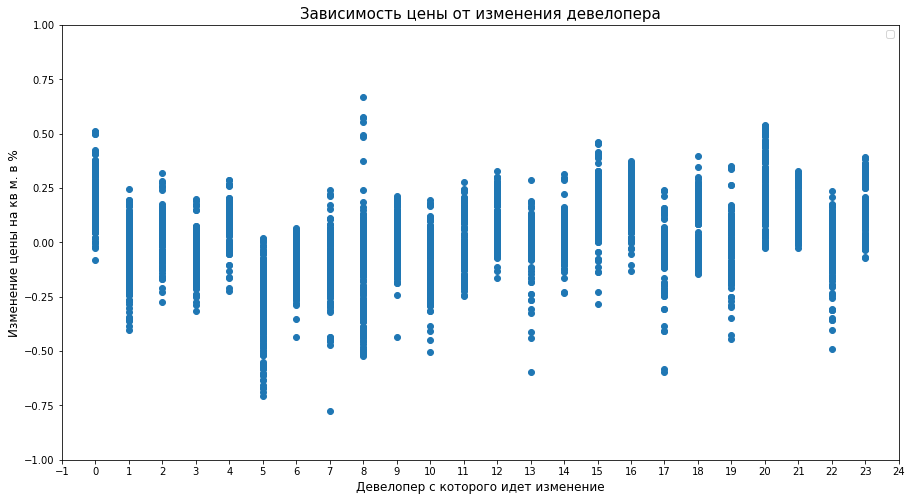

In [125]:
fig,ax = plt.subplots() 
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlim=(-1, 24), ylim=(-1, 1))
plt.scatter(ax_x, change)
plt.legend()
plt.xlabel('Девелопер с которого идет изменение', fontsize=12)
plt.ylabel('Изменение цены на кв м. в %', fontsize=12)
plt.title('Зависимость цены от изменения девелопера', fontsize=15)
fig.set_figwidth(15)
fig.set_figheight(8)